In [110]:
#Uhhhhhhh it might be time to stop using minnie. The function was for when you didn't really understand what was going on
#Now you know how to use this stuff... what you were doing before wasn't complicated enough for defined functions
#Or at the very least... What you lost by coding those functions was the ability to use certain arguments 
# Which are in the underlying packages. Arguments like tagclass and whatnot...


"""Random cool note:
You could definitely make a neural network where the inputs are jisho tags and the output is media frequency.
Not all jisho words are gonna show up in the papers you scrape but you could train a network to predict frequency
based off the tags and then generate data in a way... It's kinda cool huh?
Unfortunately the downfall is probably just how wide ranging the frequency count will be compared to a one-hot encoding
of only 5 variables. I don't think the computer could predict with fine tuned accuracy. You could probably fit each word
into a frequency quartile though..."""

import kanji_lists
import re
import urllib as ur
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


#My Stuff
from importlib import reload  
import soyeon as sy
import minnie as mn
# import shuhua as sh
# import soojin as sn
# import miyeon as my
# import yuqi as yq
import jisho
import jiten
import kanjify
import setstats

In [109]:
class Person:
    gender='guy'
    
    def __init__(self,name):
        self.name = name
    
personA = Person('Tingus')
personB = Person('Pingus')


personA.name, personB.name
personA.gender

'guy'

In [16]:
len(kanji_lists.JINMEIYO)

863

In [3]:
kanji_list = pd.read_excel('graded_joyo.xlsx',index_col=0)

def collect_scores(listy,invert=False):
    scores=[]        
    for k in listy:
        try:
            if invert == False:
                scores.append(kanji_list.loc[k]['Score'])
            else:
                scores.append(11.2-kanji_list.loc[k]['Score'])
        except KeyError:
            if invert == False:
                print(f'{k} not in Kanji list, assigning frequency score of zero.')
                scores.append(0)
            else:
                print(f'{k} not in Kanji list, assigning frequency score of Max=11.2.')
                scores.append(11.2)
            
    scores.sort()
    return scores

def utaten(link):
    soup = mn.scrape(link)
    results = mn.scout(soup,'span',tagclass='rb')
    kashi=''
    
    for r in results:
        kashi += r.text
    setty = kanjify.do(kashi)

    return setty

def utanet(link):
    soup = mn.scrape(link)
    results = soup.find_all('div',{"id":'kashi_area'})
    kashi = results[0].text
    setty = kanjify.do(kashi)
    
    return setty

In [ ]:
#Sample songs from two websites
#If you were curious about what each song was...
yakimochi = 'https://utaten.com/lyric/yc15072203/'
hitchcock = 'https://utaten.com/lyric/yb18050915/'
hachigatu = 'https://utaten.com/lyric/mi19040240/'
ashitakitto = 'https://utaten.com/lyric/sa15060111/'


linksy_ten = ['https://utaten.com/lyric/yc15072203/',
             'https://utaten.com/lyric/yb18050915/',
             'https://utaten.com/lyric/mi19040240/',
             'https://utaten.com/lyric/sa15060111/']

linksy_net = ['https://www.uta-net.com/song/167757/',
              'https://www.uta-net.com/song/247424/',
              'https://www.uta-net.com/song/265902/',
              'https://www.uta-net.com/song/187516/']

#Gomis is a great sample for unit testing Kanjify, it contains english characters, numbers, slashes, hira, kata, kanji
gomis=[]

for l in linksy_net:
    soup = mn.scrape(l)
    results = soup.find_all('div',{"id":'kashi_area'})
    gomis.append(results[0].text)

In [ ]:
%%time

for l in linksy_ten:
    ten = utaten(l)
    collect_scores(ten,True)

In [ ]:
%%time

for l in linksy_net:
    ten = utanet(l)
    collect_scores(ten,True)

縋 not in Kanji list, assigning frequency score of Max=11.2.
俯 not in Kanji list, assigning frequency score of Max=11.2.
辿 not in Kanji list, assigning frequency score of Max=11.2.
舵 not in Kanji list, assigning frequency score of Max=11.2.
儘 not in Kanji list, assigning frequency score of Max=11.2.
瞑 not in Kanji list, assigning frequency score of Max=11.2.
詭 not in Kanji list, assigning frequency score of Max=11.2.
擽 not in Kanji list, assigning frequency score of Max=11.2.
跨 not in Kanji list, assigning frequency score of Max=11.2.
頷 not in Kanji list, assigning frequency score of Max=11.2.
瞞 not in Kanji list, assigning frequency score of Max=11.2.
霞 not in Kanji list, assigning frequency score of Max=11.2.
訝 not in Kanji list, assigning frequency score of Max=11.2.


Text(0.5, 1.0, 'Kanji Difficulty w/ Ashita Kitto II Hi 6.44')

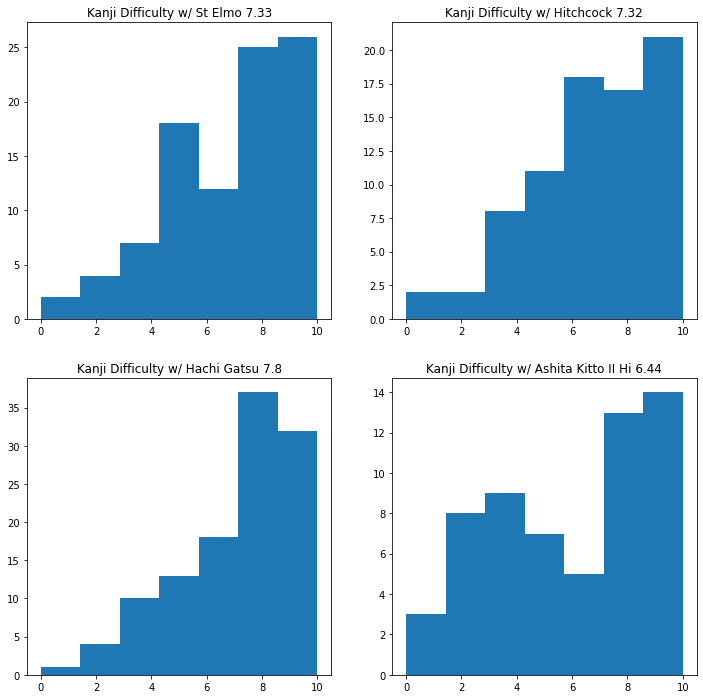

In [117]:
#Its important to think about how a total difficulty score should be calculated...
#Dividing the sum by the length isn't really a normalization but rather an average difficulty score for the kanji in the song
#A total is a more appropriate difficulty because you still have to learn all those kanji you know?
#You can pair this information with known kanji to have a personalize difficulty score.

#In a way, generating difficulty scores for text is a very neat thing, a function worth designing don't you think?
#Some robust function which picks out kanji from a string and then generates a difficulty score.



ten = utanet('https://www.uta-net.com/song/293789/')
scores_tenA = collect_scores(ten,True)

ten = utaten('https://utaten.com/lyric/yb18050915/')
scores_tenB = collect_scores(ten,True)

ten = utaten('https://utaten.com/lyric/mi19040240/')
scores_tenC = collect_scores(ten,True)

ten = utaten('https://utaten.com/lyric/sa15060111/')
scores_tenD = collect_scores(ten,True)




plt.figure(figsize=(12,12))
ax0 = plt.subplot(2,2,1)
ax0.hist(scores_tenA,7,(0,10))
ax0.set_title(f'Kanji Difficulty w/ St Elmo {round(sum(scores_tenA)/len(scores_tenA),2)}')

ax1 = plt.subplot(2,2,2)
ax1.hist(scores_tenB,7,(0,10))
ax1.set_title(f'Kanji Difficulty w/ Hitchcock {round(sum(scores_tenB)/len(scores_tenB),2)}')

ax2 = plt.subplot(2,2,3)
ax2.hist(scores_tenC,7,(0,10))
ax2.set_title(f'Kanji Difficulty w/ Hachi Gatsu {round(sum(scores_tenC)/len(scores_tenC),2)}')

ax3 = plt.subplot(2,2,4)
ax3.hist(scores_tenD,7,(0,10))
ax3.set_title(f'Kanji Difficulty w/ Ashita Kitto II Hi {round(sum(scores_tenD)/len(scores_tenD),2)}')

In [ ]:
kanji_list = pd.read_excel('graded_joyo.xlsx',index_col=0)
sogo = "一七三上下中九二五人休先入八六円出力十千口右名四土夕大天女子字学小山川左年手文日早月木本村林校森正気水火犬玉王生田男町白百目石空立竹糸耳花草虫見貝赤足車金雨青音万丸交京今会体何作元兄光公内冬刀分切前北午半南原友古台合同回図国園地場声売夏外多夜太妹姉室家寺少工市帰広店弓引弟弱強当形後心思戸才教数新方明春昼時晴曜書朝来東楽歌止歩母毎毛池汽海点父牛理用画番直矢知社秋答算米紙組絵線羽考聞肉自色茶行西親角言計記話語読買走近通週道遠里野長門間雪雲電頭顔風食首馬高魚鳥鳴麦黒丁世両主乗予事仕他代住使係倍全具写助勉動勝化区医去反取受号向君味命和品員商問央始委守安定実客宮対局屋州平度庫式役待急悪悲意所打投拾持指旅族昔暑暗曲有服期根業様横次歯死決注泳洋消温漢物球由申界病発皿相県真研礼神究級終羊習者苦落薬血詩調談豆負起転軽追送速進運部配酒重鉄開院集題飲駅不争付以仲伝位低便信兵別利労単各変夫失好完建必料昨最未末果欠氏民求治浴灯産競約良英菜要軍辺連飯験亡私岩星活科細谷黄坂宿寒岸幸想感放昭植油波流湖湯炭皮短祭第緑育荷身農返都面令借側働兆児共冷初加努卒協参周器固害差席府愛成戦折札束松梅械標法浅無牧特票結給続置芸街衣賀選鏡順洗船列島帳庭息整板柱橋氷深港畑登着福秒章童笛筆等箱練美葉表路遊銀陽階館鼻井佐例候健億典刷副功勇包博印司城埼塩奈媛季孫官富察岐岡崎巣希帯底康徒徳念挙改敗散旗景望材栃栄案梨極機残沖泣清満滋漁潟然焼照熊熱的省祝種笑管節縄群老茨覚観訓試説課議貨輪辞達量録関阜阪陸隊静願類飛養香鹿久仏仮件任似余価保個停備像再刊判務厚句可史告喜営因団囲圧在基堂報境増士夢妻婦容寄導居布弁往得応快性情技招授接損支政救断易暴格桜検構武歴殺毒比永河混減準災燃犯状独率現留略益破確祖禁移税粉素経総編績罪義職能興航術許証評謝象貧責貯貸費賞質述迷逆造過限険際領並乱乳供俳値傷優冊券割危卵吸呼困姿存宅宇宙宝密将尊就届巻干幼座忘我捨探敬敵映晩暖机枚染株欲段泉源灰片痛看秘穴窓簡糖系紅納胃背胸脳腹舌若蔵裏訳詞認誕論警賃郵針閉除難革預骨互偉刺壊婚寝弾彩影彼御怒怖恋恐掘援暇杯歳汚泊浜浮渡為煮珍甘皆盗眠触踊輩違隠鮮麗了伸冗寿掃斤某欧聴超辛邪酔魅魔嫌戻汁泥渋濯猫缶肌臭釣"
known = '一七三上下中九二五人休先入八六円出力十千口右名四土夕大天女子字学小山川左年手文日早月木本村林校森正気水火犬玉王生田男町白百目石空立竹糸耳花草虫見貝赤足車金雨青音万丸交京今会体何作元兄光公内冬刀分切前北午半南原友古台合同回図国園地場声売夏外多夜太妹姉室家寺少工市帰広店弓引弟弱強当形後心思戸才教数新方明春昼時晴曜書朝来東楽歌止歩母毎毛池汽海点父牛理用画番直矢知社秋答算米紙組絵線羽考聞肉自色茶行西親角言計記話語読買走近通週道遠里野長門間雪雲電頭顔風食首馬高魚鳥鳴麦黒丁世両主乗予事仕他代住使係倍全具写助勉動勝化区医去反取受号向君味命和品員商問央始委守安定実客宮対局屋州平度庫式役待急悪悲意所打投拾持指旅族昔暑暗曲有服期根業様横次歯死決注泳洋消温漢物球由申界病発皿相県真研礼神究級終羊習者苦落薬血詩調談豆負起転軽追送速進運部配酒重鉄開院集題飲駅不争付以仲伝位低便信兵別利労単各変夫失好完建必料昨最未末果欠氏民求治浴灯産競約良英菜要軍辺連飯験亡私' 
familiar = '岩星活科細谷黄坂宿寒岸幸想感放昭植油波流湖湯炭皮短祭第緑育荷身農返都面令借側働兆児共冷初加努卒協参周器固害差席府愛成戦折札束松梅械標法浅無牧特票結給続置芸街衣賀選鏡順洗'
seen = '船列島帳庭息整板柱橋氷深港畑登着福秒章童笛筆等箱練美葉表路遊銀陽階館鼻井佐例候健億典刷副功勇包博印司城埼塩奈媛季孫官富察岐岡崎巣希帯底康徒徳念挙改敗散旗景望材栃栄案梨極機残沖泣清満滋漁潟然焼照熊熱的省祝種笑管節縄群老茨覚観訓試説課議貨輪辞達量録関阜阪陸隊静願類飛養香鹿久仏仮件任似余価保個停備像再刊判務厚句可史告喜営因団囲圧在基堂報境増士夢妻婦容寄導居布弁往得応快性情技招授接損支政救断易暴格桜検構武歴殺毒比永河混減準災燃犯状独率現留略益破確祖禁移税粉素経総編績罪義職能興航術許証評謝象貧責貯貸費賞質述迷逆造過限険際領並乱乳供俳値傷優冊券割危卵吸呼困姿存宅宇宙宝密将尊就届巻干幼座忘我捨探敬敵映晩暖机枚染株欲段泉源灰片痛看秘穴窓簡糖系紅納胃背胸脳腹舌若蔵裏訳詞認誕論警賃郵針閉除難革預骨互偉刺壊婚寝弾彩影彼御怒怖恋恐掘援暇杯歳汚泊浜浮渡為煮珍甘皆盗眠触踊輩違隠鮮麗了伸冗寿掃斤某欧聴超辛邪酔魅魔嫌戻汁泥渋濯猫缶肌臭釣'

overlap=[]
for s in sogo:
    overlap.append(kanji_list.loc[s]['Score'])
    
known_scores=[]
for k in known:
    known_scores.append(kanji_list.loc[k]['Score'])
    
familiar_scores=[]
for f in familiar:
    familiar_scores.append(kanji_list.loc[f]['Score'])
    
seen_scores=[]
for s in seen:
    seen_scores.append(kanji_list.loc[s]['Score'])

unknown=[]
for k in kanji_list.index:
    if k not in sogo:
        unknown.append(kanji_list.loc[k]['Score'])

        
len(unknown),len(seen),len(familiar),len(known)

In [ ]:
plt.figure(figsize=(12,12))
ax0 = plt.subplot(2,2,1) #THIS IS OP. You make the object then modify it. 
#I'm still not sure how the program knows to fit these all in the originally defined figure though...
ax0.hist(kanji_list['Score'],5,(0,10))
ax0.set_title('Total Kanji')
ax1 = plt.subplot(2,2,2)
ax1.set_ylim(0,550)
ax1.set_title('Known Kanji')
ax1.hist(overlap,5,(0,10))
ax2 = plt.subplot(2,2,3)
ax2.set_title('Overlap Plot (High Res. & Edges Trimmed)')
ax2.hist([overlap,unknown],8,(1,9),stacked=True)
ax3 = plt.subplot(2,2,4)
ax3.set_title('Detailed Breakdown')
ax3.set_xlabel('Usefulness')
ax3.set_ylabel('# of Kanji')
ax3.hist([known_scores,familiar_scores,seen_scores,unknown],5,(0,10),stacked=True,
         label=['Well Known','Studying Now','Kinda Recognize','Uknown'])
ax3.legend(prop={'size': 10})


#check out how I use pandas DataFrame.merge method:
#SAtier.merge(df,left_index=True, right_index=True).sort_values('Summed Score',ascending=False)
#You can merge on specific columns (probably a lot easier in other cases), or on the index by setting each index to true.

In [17]:
extra = pd.read_excel('extra_kanji.xlsx',index_col=0)
joyo = pd.read_excel('graded_joyo.xlsx',index_col=0)

cnx = sy.opn("127.0.0.1", "root", "J@Y@Hr0m", "nihongo")

cursor = cnx.cursor()
stmt = """
INSERT INTO `core`
(`idcore`, `kanji`, `onyom`, `kunyom`, `meaning`, `score`, `joyo`)
VALUES (%s, %s, %s, %s, %s, %s, %s);
"""

j=0
for k in joyo.index:
    if j > 5000:
        read = jisho.kanji_readings(k)
        mean = jisho.kanji_meaning(k)
        pack =  (j,k,read[0],read[1],mean,joyo.loc[k]['Score'],1)
        print(pack)
        cursor.execute(stmt,pack)
        cnx.commit()
        print('Executed & Commited')
        j+=1
    else:
        print('Skipping', k)
        j+=1
for e in extra.index:
    if j > 2516:
        read = jisho.kanji_readings(e)
        mean = jisho.kanji_meaning(e)
        pack = (j,e,read[0],read[1],mean,extra.loc[e]['Score'],0)
        print(pack)
        cursor.execute(stmt,pack)
        cnx.commit()
        print('Executed & Commited')
        j+=1
    else:
        print('Skipping',e)
        j+=1

# j=0
# for k in kanji_list.index:
#     if j > 2000:
#         on,kun = pingJisho(k)
#         pack = [j,k,on,kun]
#         print(pack)
#         for i in range(kanji_list.shape[1]):
#             if i == 7:
#                 pack.append(kanji_list.loc[k][i])
#             else:
#                 pack.append(int(kanji_list.loc[k][i]))
#         pack = tuple(pack)
#         try:
#             cursor.execute(stmt,pack)
#             cnx.commit()
#             print('Executed & Commited')
#         except mysql.connector.IntegrityError:
#             upquer = f"UPDATE `kanji` SET `onyom` = '{on}', `kunyom` = '{kun}' WHERE (`idkanji` = '{j}');"
#             cursor.execute(upquer)
#             cnx.commit()
#             print('Fixed: ',k)
#     else:
#         print('Skipping', k)
#     j+=1
    

cnx.close()





Connection to MySQL DB successful
Skipping 日
Skipping 物
Skipping 学
Skipping 大
Skipping 生
Skipping 上
Skipping 手
Skipping 出
Skipping 年
Skipping 下
Skipping 一
Skipping 事
Skipping 気
Skipping 来
Skipping 会
Skipping 分
Skipping 行
Skipping 今
Skipping 方
Skipping 見
Skipping 度
Skipping 理
Skipping 人
Skipping 間
Skipping 入
Skipping 場
Skipping 合
Skipping 文
Skipping 時
Skipping 外
Skipping 食
Skipping 通
Skipping 月
Skipping 書
Skipping 動
Skipping 自
Skipping 曜
Skipping 車
Skipping 何
Skipping 切
Skipping 子
Skipping 作
Skipping 先
Skipping 用
Skipping 地
Skipping 不
Skipping 国
Skipping 当
Skipping 心
Skipping 業
Skipping 家
Skipping 引
Skipping 電
Skipping 金
Skipping 水
Skipping 中
Skipping 立
Skipping 意
Skipping 所
Skipping 道
Skipping 味
Skipping 長
Skipping 明
Skipping 発
Skipping 小
Skipping 真
Skipping 定
Skipping 名
Skipping 実
Skipping 感
Skipping 教
Skipping 目
Skipping 点
Skipping 品
Skipping 者
Skipping 止
Skipping 着
Skipping 女
Skipping 言
Skipping 口
Skipping 正
Skipping 話
Skipping 語
Skipping 面
Skipping 予
Skipping 高
Skipping 体
Skipping 

Skipping 晶
Skipping 忍
Skipping 礁
Skipping 牲
Skipping 帥
Skipping 墜
Skipping 爽
Skipping 蜂
Skipping 峠
Skipping 琴
Skipping 籠
Skipping 溺
Skipping 弊
Skipping 餌
Skipping 峡
Skipping 韓
Skipping 伐
Skipping 那
Skipping 剖
Skipping 瞭
Skipping 肯
Skipping 款
Skipping 娯
Skipping 慕
Skipping 彰
Skipping 漆
Skipping 崇
Skipping 芯
Skipping 蛮
Skipping 杉
Skipping 奈
Skipping 枕
Skipping 悼
Skipping 痢
Skipping 喉
Skipping 遜
Skipping 槽
Skipping 枢
Skipping 僅
Skipping 幽
Skipping 膝
Skipping 舶
Skipping 桑
Skipping 諮
Skipping 穂
Skipping 紳
Skipping 堅
Skipping 蹴
Skipping 戚
Skipping 賀
Skipping 祥
Skipping 忌
Skipping 捉
Skipping 拭
Skipping 雌
Skipping 虜
Skipping 鍛
Skipping 遭
Skipping 寡
Skipping 訟
Skipping 搭
Skipping 尺
Skipping 桃
Skipping 潟
Skipping 硫
Skipping 棟
Skipping 且
Skipping 藩
Skipping 須
Skipping 呪
Skipping 捻
Skipping 股
Skipping 昆
Skipping 宰
Skipping 陵
Skipping 艇
Skipping 婆
Skipping 囚
Skipping 吉
Skipping 津
Skipping 餓
Skipping 披
Skipping 癒
Skipping 餅
Skipping 箋
Skipping 偵
Skipping 侍
Skipping 妬
Skipping 貞
Skipping 耗
Skipping 渓

(2520, '眞', 'ま,まこと', 'シン', 'truth,reality,Buddhist sect', 0.0, 0)
Executed & Commited
(2521, '帖', 'かきもの', 'チョウ,ジョウ', 'quire (of paper),bundle of seaweed,counter for screens,notebook', 0.0, 0)
Executed & Commited
(2522, '藝', 'のり,う,わざ', 'ゲイ,ウン', 'art,craft,performance,acting,trick,stunt', 0.0, 0)
Executed & Commited
(2523, '茜', 'あかね', 'セン', 'madder,red dye,Turkey red', 0.0, 0)
Executed & Commited
(2524, '篠', 'すず,しの,ささ', 'ゾウ,ショウ', 'bamboo grass', 0.0, 0)
Executed & Commited
(2525, '姐', 'ねえさん,あね', 'ソ,シャ', 'elder sister,maidservant', 0.0, 0)
Executed & Commited
(2526, '玲', None, 'レイ', 'sound of jewels', 0.0, 0)
Executed & Commited
(2527, '砦', 'とりで', 'サイ', 'fort,stronghold,entrenchments', 0.0, 0)
Executed & Commited
(2528, '叛', 'そむ', 'ハン,ホン', 'disobey,defy,go back on,rebel,rebellion', 0.0, 0)
Executed & Commited
(2529, '魯', 'おろか', 'ロ', 'foolish,Russia', 0.0, 0)
Executed & Commited
(2530, '儂', 'わし,かれ', 'ドウ,ノウ', 'I,my,he,his,me (used by old people)', 0.0, 0)
Executed & Commited
(2531, '綾', 'あや

In [8]:
cnx.close()

In [14]:
for e in extra.index:
    print(e)

其
此
呆
兎
繋
濡
噌
洒
馳
碗
纏
賑
阿
喧
喋
或
溜
綺
些
胡
只
揃
儲
勿
瓜
斐
塵
鞄
而
頁
吊
眩
剃
葡
撒
詫
嘩
也
筈
贅
鯉
惚
殆
埃
髭
痺
怯
莫
揉
叩
蝶
臥
紐
炒
伊
蘭
拗
噂
嬉
吠
唸
鼠
烏
焚
蘇
蓮
咳
貰
叶
蕎
汲
躇
葵
躊
梯
萌
撫
笥
遥
尖
襖
囁
翔
奢
凌
綴
稀
瑞
柴
睨
溢
燭
杏
秤
釘
蒙
騙
覗
忽
瞼
這
雛
霞
辻
槌
雀
聡
煽
於
馴
壺
靖
云
辿
笠
漕
乃
滲
歪
逞
捧
淀
藁
咎
桐
禄
陀
垢
狐
舐
蟹
杖
呟
冴
甥
癌
頷
鳩
皺
竿
董
隼
踵
柏
禿
獅
苑
萩
掠
葦
輿
琵
琶
苔
隈
軋
鴨
栗
棲
狼
哉
娼
淵
鮎
梁
讐
迦
濠
喘
牡
珊
牌
樽
薔
俣
簾
鎧
罠
薩
幡
幌
菩
晒
佇
寅
狸
閃
猪
庇
李
曼
姑
俯
函
槍
舵
撥
爺
楊
薇
厨
菅
恰
袴
荻
姜
磯
敦
鷹
蜀
卿
桂
嘉
辰
憐
訊
灌
惹
椿
笹
智
杜
巳
鷲
狗
謳
蒲
絆
庵
樺
惣
洩
昏
洛
愕
桶
琉
橘
糞
摺
箕
朋
盧
濤
窺
臀
浩
晋
嶋
荼
諫
膣
牽
庄
蹟
杢
汝
註
鷗
瀧
裟
吻
曳
丞
劉
芭
狽
娥
襞
宏
坐
櫻
翠
噓
檜
猥
弘
屍
頰
莉
肴
衿
翳
峨
瑜
龍
舘
挺
吾
允
筑
榊
甦
梓
餉
套
彦
艘
凰
腔
妓
攣
昌
槻
鋒
緋
蕉
芦
姦
噺
湊
袈
廻
媚
迂
蔣
叉
澤
寵
吞
錏
櫓
哢
奼
攘
鞍
砥
裳
俱
仔
頸
喰
播
讃
盃
倭
宋
堺
蔭
逢
楚
腿
牢
夷
傳
窪
妾
蒼
篇
郁
裡
蠟
紗
藪
眸
條
趙
駈
麿
梶
袁
叡
鄭
矩
瘦
毅
亮
昂
晃
仇
秦
漱
菱
諏
呻
祀
鵜
孟
堵
髙
燈
國
穿
眞
帖
藝
茜
篠
姐
玲
砦
叛
魯
儂
綾
伽
淳
禰
躰
簞
嶺
祐
峯
茫
轟
嚙
摑
薙
稔
蝦
鞭
圭
淋
悶
輔
搔
蔦
鳳
厭
魏
憑
伍
楠
廣
訝
洲
芥
佑
軀
駿
曾
揆
旭
諜
駕
渕
鞘
之


In [ ]:
#Easy loop for inserting excel sheet data into a SQL Database
import mysql
cnx = sy.opn("127.0.0.1", "root", "J@Y@Hr0m", "nihongo")

cursor = cnx.cursor()
stmt = """
INSERT INTO `tags`
(`idtags`, `kanji`,`common`, `WK`, `N5`, `N4`, `N3`, `N2`, `N1`)
VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s);
"""

df = pd.read_excel('extra_kanji.xlsx',index_col=0)
j=2137
for k in df.index:
    if j > 2520:
        entry = list(df.loc[k])
        entry.pop(7)
        entry.insert(0,k)
        entry.insert(0,j)
        print(entry)
        j+=1
        try:
            cursor.execute(stmt,entry)
            cnx.commit()
            print('Executed & Commited')
        except mysql.connector.DatabaseError:
            print(f"This {k} MF wont write")            
    else:
        print('Skipping', k)
        j+=1
    
cnx.close()

In [69]:
reload(sy)

cnx = sy.opn("127.0.0.1", "root", "J@Y@Hr0m", "nihongo")
cursor = cnx.cursor()

quiz = sy.pullquiz('medium',True,cursor)

cnx.close()

Connection to MySQL DB successful
[0.15, 2, 15]
[2, 4, 10]
[4, 6, 10]
[6, 8, 10]
[8, 100, 5]


AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [83]:
df = pd.DataFrame(np.array(quiz)[:,1:4],index = np.array(quiz)[:,0],columns = ['kun','on','mean'])
df

,kun,on,mean
仁,None,"ジン,ニ,ニン","humanity,virtue,benevolence,charity,man,kernel"
業,わざ,"ギョウ,ゴウ","business,vocation,arts,performance"
城,しろ,"ジョウ,セイ",castle
砕,くだ,サイ,"smash,break,crush,familiar,popular"
避,"よ,さ",ヒ,"evade,avoid,avert,ward off,shirk,shun"
下,"した,しも,くだ,さ,お,もと","カ,ゲ","below,down,descend,give,low,inferior"
内,うち,"ナイ,ダイ","inside,within,between,among,house,home"
席,むしろ,セキ,"seat,mat,occasion,place"
所,"とこ,ところ,どころ",ショ,"place,extent"
爆,は,バク,"bomb,burst open,pop,split"


In [82]:
quiz

[('仁', None, 'ジン,ニ,ニン', 'humanity,virtue,benevolence,charity,man,kernel'),
 ('業', 'わざ', 'ギョウ,ゴウ', 'business,vocation,arts,performance'),
 ('城', 'しろ', 'ジョウ,セイ', 'castle'),
 ('砕', 'くだ', 'サイ', 'smash,break,crush,familiar,popular'),
 ('避', 'よ,さ', 'ヒ', 'evade,avoid,avert,ward off,shirk,shun'),
 ('下', 'した,しも,くだ,さ,お,もと', 'カ,ゲ', 'below,down,descend,give,low,inferior'),
 ('内', 'うち', 'ナイ,ダイ', 'inside,within,between,among,house,home'),
 ('席', 'むしろ', 'セキ', 'seat,mat,occasion,place'),
 ('所', 'とこ,ところ,どころ', 'ショ', 'place,extent'),
 ('爆', 'は', 'バク', 'bomb,burst open,pop,split'),
 ('億', None, 'オク', 'hundred million,10**8'),
 ('羽', 'は,はね,わ', 'ウ', 'feathers,counter for birds,rabbits'),
 ('粗', 'あら', 'ソ', 'coarse,rough,rugged'),
 ('上', 'のぼ,たてまつ,あ,うえ,かみ,うわ', 'ジョウ,ショウ,シャン', 'above,up'),
 ('赤', 'あか', 'セキ,シャク', 'red'),
 ('手', 'た,て', 'シュ,ズ', 'hand'),
 ('裸', 'はだか', 'ラ', 'naked,nude,uncovered,partially clothed'),
 ('容', 'い', 'ヨウ', 'contain,form,looks'),
 ('出', 'い,だ,で', 'シュツ,スイ', 'exit,leave,go out,come out,put out